In [16]:
import numpy as np

import pandas as pd

from collections import OrderedDict

from sklearn.preprocessing import StandardScaler

# 분류기 

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

# 측정

from sklearn.metrics import accuracy_score

In [17]:
import seaborn as sns

import matplotlib

df=pd.read_csv("Case5_bi.csv",sep=",",index_col=0)

df1=pd.read_csv("Case5_bitest.csv",sep=",",index_col=0)

In [3]:
df2 = df.append(df1)

df, df1 = df2.loc[:4989,"CE_ACCESSIBILITY":"DP_DISCHARGEPROCESS"], df2.loc[4989:,"CE_ACCESSIBILITY":"DP_DISCHARGEPROCESS"]

df.head()

,CE_ACCESSIBILITY,CE_CSAT,CE_VALUEFORMONEY,EM_IMMEDIATEATTENTION,EM_NURSING,EM_DOCTOR,EM_OVERALL,AD_TIME,AD_TARRIFFPACKAGESEXPLAINATION,AD_STAFFATTITUDE,...,NS_CALLBELLRESPONSE,NS_NURSESATTITUDE,NS_NURSEPROACTIVENESS,NS_NURSEPATIENCE,OVS_OVERALLSTAFFATTITUDE,OVS_OVERALLSTAFFPROMPTNESS,OVS_SECURITYATTITUDE,DP_DISCHARGETIME,DP_DISCHARGEQUERIES,DP_DISCHARGEPROCESS
SN,,,,,,,,,,,,,,,,,,,,,
1,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3,3,2,2,4,4,4,4,3,3,4,...,4,4,4,4,4,4,4,3,4,3
4,4,4,3,4,4,4,4,4,4,4,...,4,4,3,4,4,3,3,3,4,3
5,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [4]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

kmo_model

0.9600379467385718

In [5]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df, 34, rotation=None)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,15.479474
1,3.156115
2,2.392806
3,1.655152
4,1.259868
5,1.151817
6,1.048208
7,0.960591
8,0.707753
9,0.566565


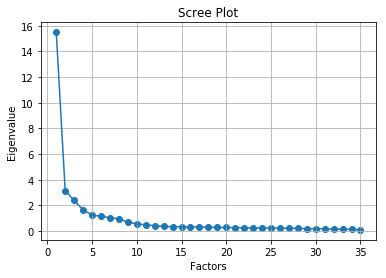

In [6]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [7]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df, 7, rotation="varimax")

In [8]:
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7
CE_ACCESSIBILITY,0.257669,0.185313,0.139075,0.094880,0.062900,0.562222,0.105402
CE_CSAT,0.295894,0.141056,0.136591,0.162120,0.065756,0.740355,0.128053
CE_VALUEFORMONEY,0.280557,0.065817,0.138961,0.201026,0.122963,0.672731,0.097345
EM_IMMEDIATEATTENTION,0.159170,0.109099,0.770177,0.072132,0.077849,0.110031,0.103218
EM_NURSING,0.176152,0.182423,0.806402,0.051732,0.029931,0.082818,0.081964
EM_DOCTOR,0.127884,0.065117,0.810335,0.067258,0.181514,0.070814,0.058238
EM_OVERALL,0.202649,0.146997,0.843061,0.103271,0.092717,0.140611,0.108434
AD_TIME,0.317268,0.139780,0.125212,0.202270,0.104394,0.158400,0.669223
AD_TARRIFFPACKAGESEXPLAINATION,0.372653,0.153790,0.158124,0.237446,0.149235,0.198140,0.645682
AD_STAFFATTITUDE,0.367785,0.268311,0.215373,0.142325,0.142254,0.090687,0.635009


In [ ]:
FNB_DIETICIAN
NS_NURSESATTITUDE
EM_DOCTOR
DP_DISCHARGEPROCESS
DOC_ATTITUDE
CE_CSAT
AD_TIME

In [21]:
df=pd.read_csv("Case5_multi.csv",sep=",",index_col=0)

df1=pd.read_csv("Case5_test.csv",sep=",",index_col=0)

In [22]:
## 더미변수화 하기
df2 = df.append(df1)
df2=pd.get_dummies(df2, drop_first=True, columns=['Sex','MaritalStatus','BedCategory','Department','InsPayorcategory'])
# pd.concat([df2,dummy],axis=1)
df2.head()
# dummy.head()

# df2[['Sex']]
## 수치형 변수들 스케일링 해주기 - Standardization 표준화

scale = StandardScaler().fit(df2[['AgeYrs','Estimatedcost']])

df, df1 = df2.loc[:4989,:], df2.loc[4989:,:]

df[['AgeYrs','Estimatedcost']] = scale.transform(df[['AgeYrs','Estimatedcost']])
df1[['AgeYrs','Estimatedcost']] = scale.transform(df1[['AgeYrs','Estimatedcost']])

# df.head()
Target = df.NPS_Status

features_1 = df[['AgeYrs','Estimatedcost','LengthofStay','FNB_DIETICIAN','NS_NURSESATTITUDE','EM_DOCTOR','DP_DISCHARGEPROCESS','DOC_ATTITUDE','CE_CSAT','AD_TIME']]
features_2 = df.loc[:,'Sex_M':]
features = pd.concat([features_1,features_2],axis=1)

Target_test = df1.NPS_Status

features_1 = df1[['AgeYrs','Estimatedcost','LengthofStay','FNB_DIETICIAN','NS_NURSESATTITUDE','EM_DOCTOR','DP_DISCHARGEPROCESS','DOC_ATTITUDE','CE_CSAT','AD_TIME']]
features_2 = df1.loc[:,'Sex_M':]
features_test = pd.concat([features_1,features_2],axis=1)
# features.head()

c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [23]:
X_train, y_train = features,Target

X_test, y_test = features_test,Target_test

MLres = {}

def Mlresult(model, score):

    MLres[model] = score

    print(MLres)

    

roc_curve_data = {}

def Rocdata(algoname, fpr, tpr, auc):

    data = [fpr,tpr,auc]

    roc_curve_data[algoname] = data

In [24]:
logi_reg = LogisticRegression()

logi_reg.fit(X_train, y_train)

y_pred = logi_reg.predict(X_test)

# score

accuracy = logi_reg.score(X_test,y_test)

Mlresult('Logistic Regression', accuracy)

{'Logistic Regression': 0.6547945205479452}


c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
